In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Neural Network

We  will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. 

## Dataset


We would be using 1000 training examples, each having a 20x20 pixel greyscale image. The dataset is mapped to y which will have either 0 or 1 (Image would represent either 0 or 1).

In [14]:
#Loading Dataset
def load_data():
    X = np.load("data/X.npy")
    Y = np.load("data/Y.npy")
    X = X[0:1000]
    Y = Y[0:1000]
    return X,Y
X,Y = load_data()

In [13]:
print ('The first element of X is: ', X[0])
print ('The size of first element of X is: ', np.size(X[0]))

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [17]:
print ('The first element of y is: ', Y[0,0])
print ('The last element of y is: ', Y[-1,0])

The first element of y is:  0
The last element of y is:  1


### Checking dimensions of variable

In [19]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(Y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


### Visualizing the data

We would be randomly select 64 rows from X and map each row back to 20 pixel by 20 pixel greyscale image and display image together.

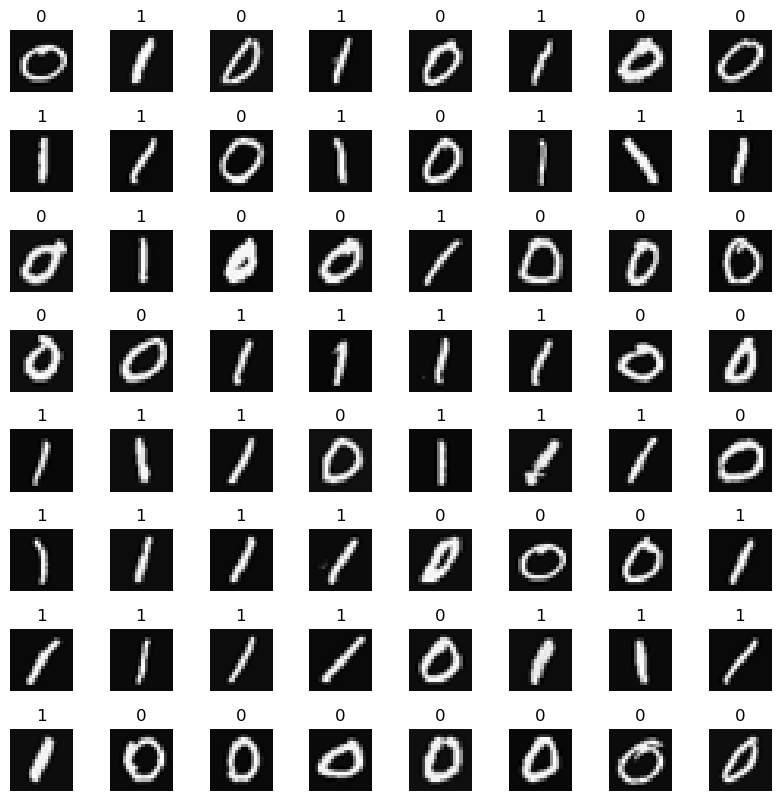

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(Y[random_index,0])
    ax.set_axis_off()

# Neural Network Model Representation

- This has three dense layers with sigmoid activations.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="images/C2_W1_Assign1.PNG" width="500" height="400">

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3. 

    - The dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (1,n) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention. 
               

In [33]:
model = Sequential([
    tf.keras.Input(shape=(400,)),
    tf.keras.layers.Dense(25, activation='sigmoid'),
    tf.keras.layers.Dense(15, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name = "my_model"
)

In [34]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


We can examine details of the model by first extracting the layers with `model.layers` and then extracting the weights with `layerx.get_weights()` as shown below.

In [37]:
[layer1, layer2, layer3] = model.layers

In [38]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [39]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.16704291],
       [ 0.61171716],
       [-0.10626185],
       [-0.42420536],
       [ 0.4999593 ],
       [ 0.59768647],
       [ 0.3446064 ],
       [-0.41344583],
       [ 0.05188102],
       [-0.6063698 ],
       [-0.06089818],
       [ 0.18845749],
       [ 0.15947932],
       [-0.53781575],
       [ 0.17873615]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


The following code will define a loss function and run gradient descent to fit the weights of the model to the training data. This will be explained in more detail in the following week.

In [47]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,Y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6184
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4443
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2946
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1987
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1426
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1088
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0865
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0710
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0599
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0511
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0443
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0391
Epoch 13/20
32/32 [==============================

To run the model on an example to make a prediction, use [Keras `predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). The input to `predict` is an array so the single example is reshaped to be two dimensional.

In [48]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 66ms/step
 predicting a zero: [[0.01614967]]
1/1 [==============================] - 0s 20ms/step
 predicting a one:  [[0.9877261]]


The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. 
In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.
As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [49]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

1/1 [==============================] - 0s 21ms/step


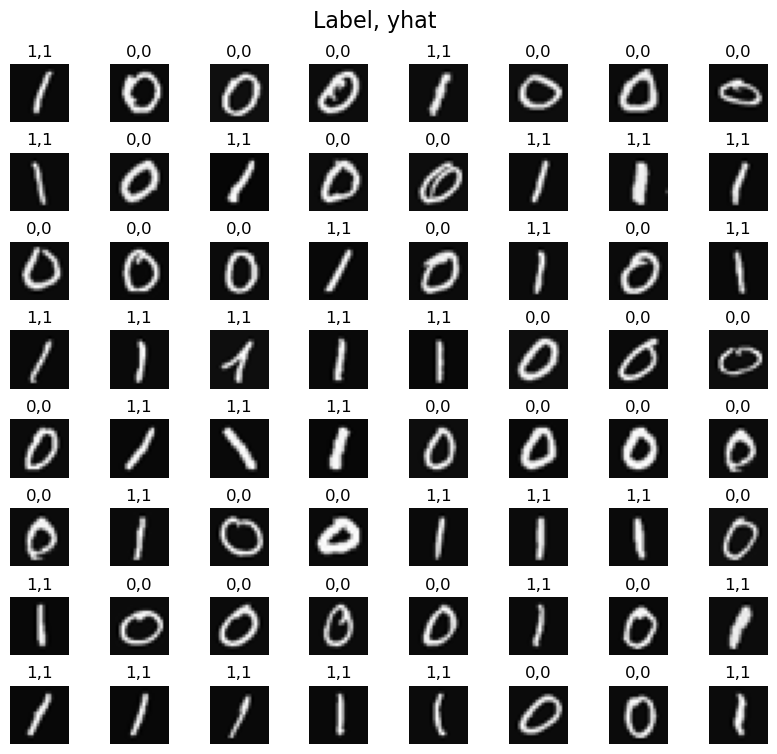

In [51]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{Y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()